In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [2]:
df=pd.read_csv("data-2.csv")
df.drop(["Unnamed: 32"],axis=1,inplace=True)

In [3]:
display(df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 


X=df.iloc[:,2:32]
y=df.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,shuffle=True)


scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [5]:
display(X.head())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
display(y.head())

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [7]:
df.diagnosis.replace({"M":1,"B":0},inplace=True)
df.diagnosis.unique()

array([1, 0])

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

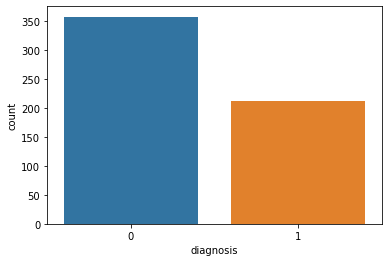

In [8]:
import seaborn as sns
sns.countplot('diagnosis', data=df)

In [9]:
! pip install np
! pip install sklearn
! pip install sklearn_nature_inspired_algorithms==0.4.3

In [10]:
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

from sklearn_nature_inspired_algorithms.model_selection.nature_inspired_search_cv import NatureInspiredSearchCV
from sklearn_nature_inspired_algorithms.helpers import score_by_generation_lineplot

In [11]:
param_grid = { 
    'n_estimators': range(20, 400, 20), 
    'max_depth': range(5, 300, 20),
    'min_samples_split': range(2, 50, 5),
    'max_features': ["auto", "sqrt", "log2"],
}

In [12]:
import numpy as np

print(f'This is {np.multiply.reduce([len(param) for param in param_grid.values()])} combinations in total.')

This is 8550 combinations in total.


In [13]:
%%time

clf = RandomForestClassifier()

nia_search = NatureInspiredSearchCV(
    clf,
    param_grid,
    cv=3,
    verbose=0,
    algorithm='gwo',
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=8,
    runs=6,
    n_jobs=-1,
    scoring='f1_macro')

nia_search.fit(X_train, y_train)

Fitting 3 folds for some of the 8550 candidates, which might total in 25650 fits
CPU times: user 12.4 s, sys: 532 ms, total: 12.9 s
Wall time: 8min 47s


NatureInspiredSearchCV(algorithm=None, cv=3, error_score=nan,
                       estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                             

<AxesSubplot:xlabel='generation', ylabel='mean score'>

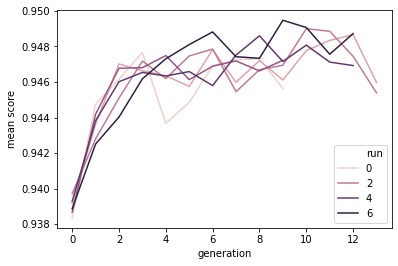

In [14]:
score_by_generation_lineplot(nia_search, metric='mean')

<AxesSubplot:xlabel='generation', ylabel='score'>

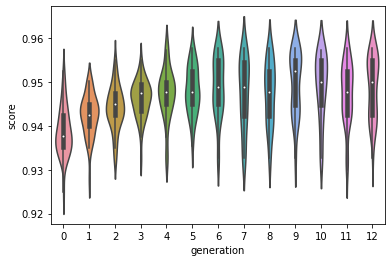

In [16]:
from sklearn_nature_inspired_algorithms.helpers import score_by_generation_violinplot
score_by_generation_violinplot(nia_search, run=5)

In [17]:
nia_search.best_params_

{'n_estimators': 40,
 'max_depth': 65,
 'min_samples_split': 2,
 'max_features': 'log2'}

In [18]:
clf = RandomForestClassifier(**nia_search.best_params_)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           B     0.9889    0.9368    0.9622        95
           M     0.8868    0.9792    0.9307        48

    accuracy                         0.9510       143
   macro avg     0.9378    0.9580    0.9464       143
weighted avg     0.9546    0.9510    0.9516       143



Precision: 0.887 
Recall: 0.979 
F1-Score: 0.931 
Accuracy: 95.1% 



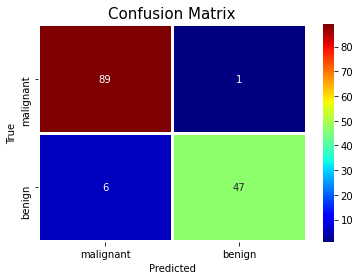

In [19]:
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
import matplotlib.pyplot as plt

cm=confusion_matrix(y_pred,y_test)
class_label = ["malignant", "benign"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label="M", average='binary')
print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 4)*100) +"% \n")

sns.heatmap(df_cm,annot=True,cmap='jet',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()